In [1]:
import nltk
from nltk.corpus import cess_esp
corpus_sentences = cess_esp.tagged_sents()
#Transformamos el corpus para reducir categorias como en la practica 2
corpus_transformado = []
corpus_original = []
for sentence in corpus_sentences:
    sentence_aux = []
    for word, label in sentence:
        if(word != "*0*"):
            if(label.startswith("v") or label.startswith("F")):
                sentence_aux.append((word, label[0:3]))
            else:
                sentence_aux.append((word, label[0:2]))
    corpus_transformado.append(sentence_aux) 
for sentence in corpus_sentences:
    corpus_original.append(sentence)      

Tarea 1: Evaluación de HMM sobre el corpus "cess-esp" original y su versión con categorias reducidas

In [2]:
#Creamos diez particiones del corpus original despúes de barajarlo para realizar Cross-Validation
from random import shuffle 
corpus_original_barajado = corpus_original
shuffle(corpus_original_barajado)
particiones_original_train = []
particiones_original_test = []
longitud_particion = len(corpus_original_barajado)//10
for i in range(0, 10):
    particiones_original_train.append(corpus_original_barajado[0:i*longitud_particion] + corpus_original_barajado[(i + 1)*longitud_particion:])
    particiones_original_test.append(corpus_original_barajado[i*longitud_particion:(i+1)*longitud_particion])   
   

In [3]:
#Calculamos el numero de palabras en las particiones de test barajadas para calcular el intervalo de error
palabrasPorTestOriginal = []
for particion in particiones_original_test:
    palabras = 0
    for sentence in particion:
        for word in sentence:
            palabras += 1
    palabrasPorTestOriginal.append(palabras)

In [4]:
#Entrenamos HMM con las 10 particiones barajadas
from nltk import hmm
precisionesHMMBarajadoOriginal = []
for i in range(0,10):
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(particiones_original_train[i])
    precisionesHMMBarajadoOriginal.append(tagger_hmm.evaluate(particiones_original_test[i]))
print(precisionesHMMBarajadoOriginal) 

[0.8953882580853468, 0.8989419919737323, 0.8948849104859335, 0.9018255147527064, 0.8984038510260958, 0.8969146260074953, 0.8933657696011352, 0.8952231793265466, 0.8982609158113067, 0.8963759620775779]


Precisión e intervalos de confianza para HMM con validación cruzada barajado con categorias originales


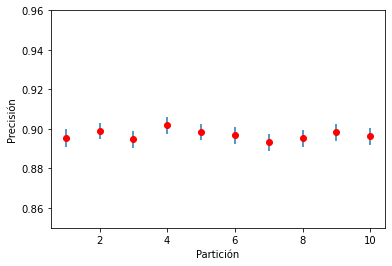

[0.8953882580853468, 0.8989419919737323, 0.8948849104859335, 0.9018255147527064, 0.8984038510260958, 0.8969146260074953, 0.8933657696011352, 0.8952231793265466, 0.8982609158113067, 0.8963759620775779]
[0.0044004194152628025, 0.004264849736970564, 0.004299310538544602, 0.0042484459672881445, 0.00421513929974732, 0.004270186282224692, 0.004306698771792538, 0.00433723806414402, 0.0043210337863016, 0.004264744269452771]


In [5]:
#Calculamos los intervalos de confianza y representamos los resultados HMM 
from math import sqrt 
import matplotlib.pyplot as plt
columnas = [1, 2, 3, 4, 5, 6 ,7 ,8 ,9 ,10]
intervaloHMMOriginal = [] 
for i in range(0,len(precisionesHMMBarajadoOriginal)): 
    s = sqrt(precisionesHMMBarajadoOriginal[i]*(1-precisionesHMMBarajadoOriginal[i])/palabrasPorTestOriginal[i]) 
    r = 1.96*s 
    intervaloHMMOriginal.append(r) 
print("Precisión e intervalos de confianza para HMM con validación cruzada barajado con categorias originales")
plt.plot(columnas, precisionesHMMBarajadoOriginal, 'ro')
plt.errorbar(columnas, precisionesHMMBarajadoOriginal, yerr=intervaloHMMOriginal,linestyle='None');
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.ylim((0.85,0.96))
plt.show()
print(precisionesHMMBarajadoOriginal)
print(intervaloHMMOriginal)

In [6]:
#Creamos diez particiones del corpus tranformado despúes de barajarlo para realizar Cross-Validation
from random import shuffle 
corpus_barajado = corpus_transformado
shuffle(corpus_barajado)
particiones_barajado_train = []
particiones_barajado_test = []
longitud_particion = len(corpus_transformado)//10
for i in range(0, 10):
    particiones_barajado_train.append(corpus_barajado[0:i*longitud_particion] + corpus_barajado[(i + 1)*longitud_particion:])
    particiones_barajado_test.append(corpus_barajado[i*longitud_particion:(i+1)*longitud_particion]) 

In [7]:
#Calculamos el numero de palabras en las particiones de test barajadas para calcular el intervalo de error
palabrasPorTestTrans = []
for particion in particiones_barajado_test:
    palabras = 0
    for sentence in particion:
        for word in sentence:
            palabras += 1
    palabrasPorTestTrans.append(palabras)

In [8]:
#Entrenamos HMM con las 10 particiones barajadas
from nltk import hmm
precisionesHMMBarajadoTrans = []
for i in range(0,10):
    tagger_hmm = hmm.HiddenMarkovModelTagger.train(particiones_barajado_train[i])
    precisionesHMMBarajadoTrans.append(tagger_hmm.evaluate(particiones_barajado_test[i]))
print(precisionesHMMBarajadoTrans)

[0.9236210081815782, 0.9258201112188154, 0.9314790746035873, 0.9249850730065678, 0.9247391952309985, 0.9252894449924718, 0.9259463028169014, 0.924662589624631, 0.9276269631388634, 0.923133972559199]


Precisión e intervalos de confianza para HMM con validación cruzada barajado con categorias reducidas


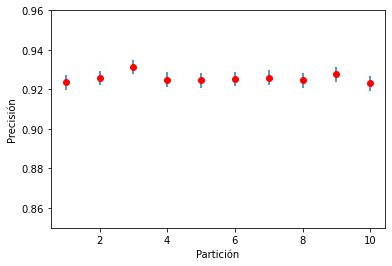

[0.9236210081815782, 0.9258201112188154, 0.9314790746035873, 0.9249850730065678, 0.9247391952309985, 0.9252894449924718, 0.9259463028169014, 0.924662589624631, 0.9276269631388634, 0.923133972559199]
[0.0037821837868149337, 0.0036687942034817874, 0.003570328176925133, 0.0038037949975512787, 0.0037723315634557893, 0.003713183749529917, 0.0038069150714890557, 0.003756144473955716, 0.003730827427146602, 0.0038000487549847287]


In [9]:
#Calculamos los intervalos de confianza y representamos los resultados HMM 
from math import sqrt 
import matplotlib.pyplot as plt
columnas = [1, 2, 3, 4, 5, 6 ,7 ,8 ,9 ,10]
intervaloHMMTrans = [] 
for i in range(0,len(precisionesHMMBarajadoTrans)): 
    s = sqrt(precisionesHMMBarajadoTrans[i]*(1-precisionesHMMBarajadoTrans[i])/palabrasPorTestTrans[i]) 
    r = 1.96*s 
    intervaloHMMTrans.append(r) 
print("Precisión e intervalos de confianza para HMM con validación cruzada barajado con categorias reducidas")
plt.plot(columnas, precisionesHMMBarajadoTrans, 'ro')
plt.errorbar(columnas, precisionesHMMBarajadoTrans, yerr=intervaloHMMTrans,linestyle='None');
plt.ylabel('Precisión')
plt.xlabel('Partición')
plt.ylim((0.85,0.96))
plt.show()
print(precisionesHMMBarajadoTrans)
print(intervaloHMMTrans)